Shapley values for the 10 feature template and tuned model

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import tqdm
import shap
df_list=[]
for filenumber in tqdm.tqdm(range(1,10)):
# Open the .root file
    filePath=f'../36_files/JetNtuple_RunIISummer16_13TeV_MC_{filenumber}.root'
    file = uproot.open(filePath)
# Access the tree structure
    tree = file['AK4jets/jetTree']
# Define the columns you want to read
    columns = ['isPhysG', 'isPhysUDS','QG_mult','QG_ptD','QG_axis2','jetPt','jetEta','jetQGl','jetMass','jetGirth','jetArea','jetChargedHadronMult','jetNeutralHadronMult','jetChargedMult','jetNeutralMult']
    df=tree.arrays(columns, library='pd')
    df_list.append(df)
df=pd.concat(df_list,ignore_index='true')
# First remove all the other types of jets from the data except the gluon and the light quark (UDS) jets
df = df[(df.isPhysG==1) | (df.isPhysUDS==1)].reset_index()
#selecting only a range of pt 
df_pt_ranged=df[(df.jetPt>30) & (df.jetPt<600)]
df=df_pt_ranged

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

train_y = train.isPhysUDS
test_y = test.isPhysUDS
# training and test variables for each training variable
#input_features = ['QG_mult','QG_ptD','QG_axis2','jetPt','jetEta','jetMass','jetGirth','jetArea','jetChargedHadronMult','jetNeutralHadronMult']
#Omitting jetPt and jetEta
input_features = ['QG_mult','QG_ptD','QG_axis2','jetMass','jetGirth','jetArea','jetChargedHadronMult','jetNeutralHadronMult']


for input in input_features:
    train_x = train[[input]]
    test_x = test[[input]]
 # Normalize the features
    train_x_mean = train_x.mean()
    train_x_std = train_x.std()
    exec(f'train_x_{input}= (train_x - train_x_mean) / train_x_std')
    exec(f'test_x_{input} = (test_x - train_x_mean) / train_x_std')

train_x=train[input_features]
test_x=test[input_features]


/home/shounak/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 9/9 [00:02<00:00,  4.06it/s]


## SIMPLE 10 FEATURE MODEL

In [2]:
from tensorflow.keras.models import load_model

model=load_model('../Main files/corrected_models_no_jetpt/model.h5')

model.summary()

2024-11-09 22:27:39.658831: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 22:27:39.853022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-09 22:27:39.853216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-09 22:27:39.895658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 22:27:39.985286: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-09 22:27:39.986810: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 100)               900       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6001 (23.44 KB)
Trainable params: 6001 (23.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
explainer = shap.Explainer(model, train_x[0:100])


In [4]:
shap_values = explainer(test_x)

ExactExplainer explainer: 107280it [36:10, 49.41it/s]                             


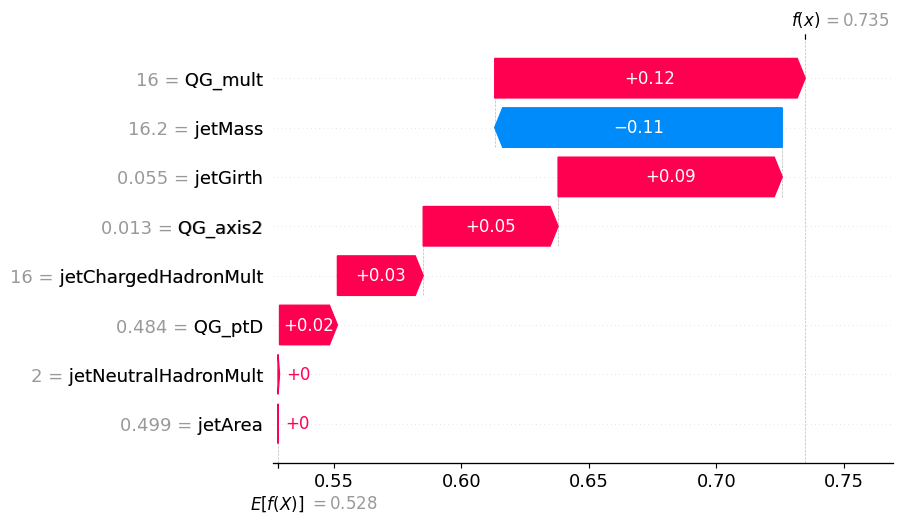

In [5]:
import shap
shap.initjs()
shap.plots.waterfall(shap_values[1050])

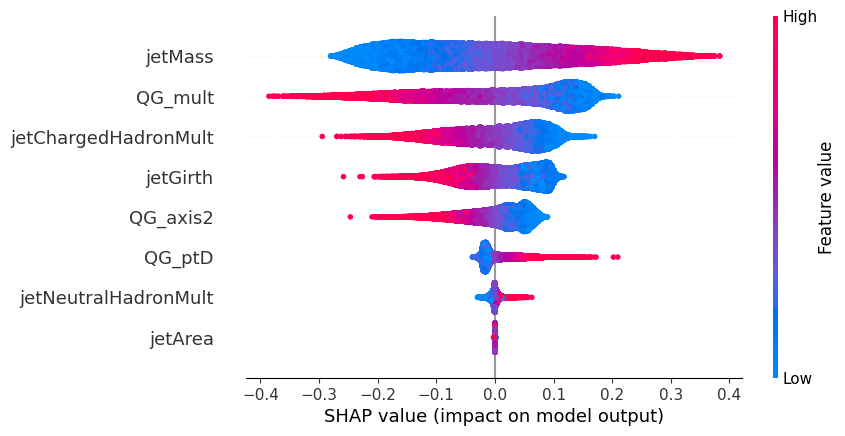

In [6]:
shap.initjs()
shap.plots.beeswarm(shap_values)

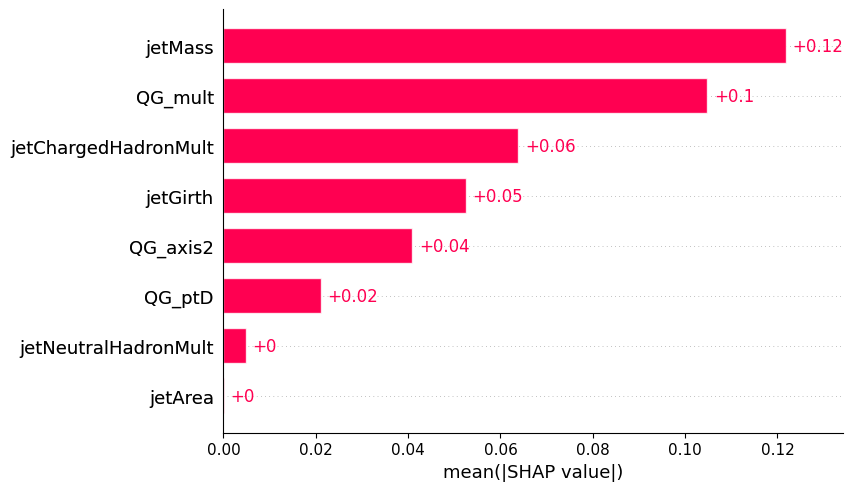

In [7]:
shap.initjs()
shap.plots.bar(shap_values)

## TUNED 10 FEATURE MODEL

In [2]:
from tensorflow.keras.models import load_model

model=load_model('../Main files/models/new_model_tuned_ad_var.h5')

model.summary()

2024-11-03 15:55:16.417813: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 15:55:16.475108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-03 15:55:16.475162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 15:55:16.477226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-03 15:55:16.488677: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 15:55:16.490375: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               4320      
                                                                 
 dense_1 (Dense)             (None, 224)               107744    
                                                                 
 dense_2 (Dense)             (None, 224)               50400     
                                                                 
 dense_3 (Dense)             (None, 224)               50400     
                                                                 
 dense_4 (Dense)             (None, 96)                21600     
                                                                 
 dense_5 (Dense)             (None, 96)                9312      
                                                                 
 dense_6 (Dense)             (None, 96)                9

In [8]:
explainer = shap.Explainer(model, train_x[0:100].to_numpy())
shap_values = explainer(test_x)


ExactExplainer explainer: 107280it [4:46:11,  6.25it/s]                             


In [5]:
# explainer = shap.ExactExplainer(model, train_x[0:100])
# shap_values = explainer(test_x)

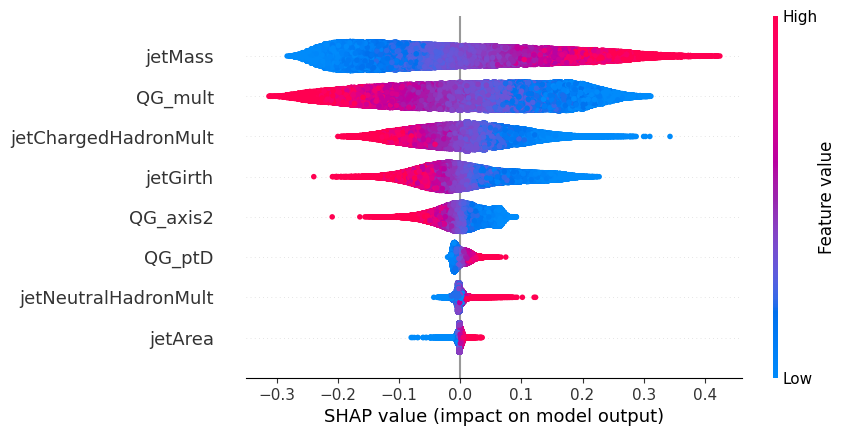

In [11]:
shap.initjs()
shap.plots.beeswarm(shap_values)

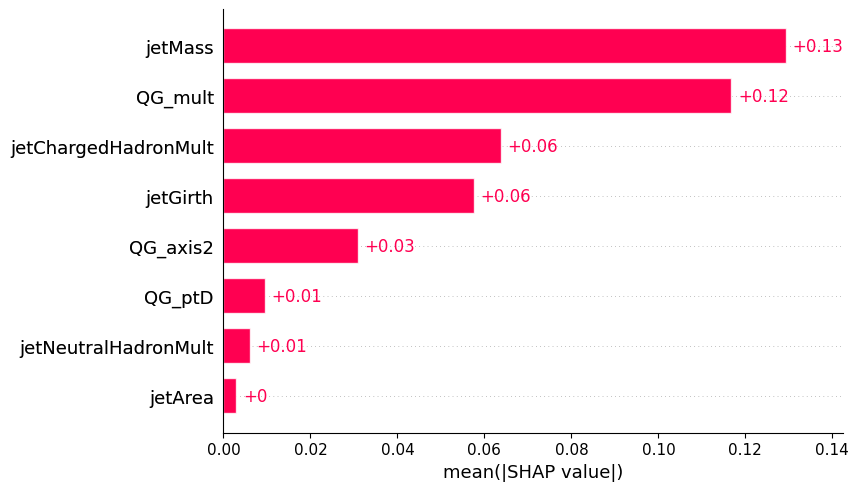

In [12]:
shap.initjs()
shap.plots.bar(shap_values)